# Chapter 1. Mining Twitter: Exploring Trending Topics, Discovering What People Are Talking About, and More

<blockquote>
<p>This content is a full-text excerpt from <a href="http://bit.ly/135dHfs" target="_blank">Mining the Social Web (2nd Edition)</a> that has been minimally converted to IPython Notebook format so that you can interactively run the example code as you read the book. The purpose of this offering is to determine if there is sufficient interest to offer the remainder of the entire book as a collection of IPython Notebooks (as a standard distribution format that's in addition to PDF, Kindle, etc.) based on feedback from you.</p>
<p>If you would like to see the full-text of this book (or other books like it) offered in a native IPython Notebook format, tweet something like <em>"@OReillyMedia: Please distribute @SocialWebMining in IPython Notebook format"</em> so that both O'Reilly Media and the author receive your feedback. Alternatively, contact O'Reilly Media using the link above. Thanks!</p>
<p>
You can also view this sampler chapter in O'Reilly's new <a href="http://chimera.labs.oreilly.com/books/1234000001583/index.html" target="_blank">Chimera ebook reader</a> or <a href="http://bit.ly/135dHfs" target="_blank">download a PDF</a>.
</p>
</blockquote>

This chapter kicks off our journey of mining the social web with
  Twitter, a rich source of social data that is a great starting point for
  social web mining because of its inherent openness for public consumption,
  clean and well-documented API, rich developer tooling, and broad appeal to
  users from every walk of life. Twitter data is particularly interesting
  because tweets happen at the "speed of thought" and are available for
  consumption as they happen in near real time, represent the broadest
  cross-section of society at an international level, and are so inherently
  multifaceted. Tweets and Twitter's "following" mechanism link people in a variety of ways, ranging from short
  (but often meaningful) conversational dialogues to interest graphs that
  connect people and the things that they care about.

Since this is the first chapter, we'll take our time acclimating to
  our journey in social web mining. However, given that Twitter data is so
  accessible and open to public scrutiny, Chapter&#160;9, <em>Twitter Cookbook</em>
  further elaborates on the broad number of data mining possibilities by
  providing a terse collection of recipes in a convenient problem/solution
  format that can be easily manipulated and readily applied to a wide range of
  problems. You'll also be able to apply concepts from future chapters to
  Twitter data.

<blockquote><div><strong>Note:</strong></div><p>Always get the latest bug-fixed source code for this chapter (and
    every other chapter) online at <a class="ulink" href="http://bit.ly/MiningTheSocialWeb2E" target="\_top">http://bit.ly/MiningTheSocialWeb2E</a>.
    Be sure to also take advantage of this book's virtual machine experience,
    as described in Appendix&#160;A, <em>Information About This Book's Virtual Machine Experience</em>, to maximize your enjoyment of the
    sample code.</p></blockquote>

# Overview

In this chapter, we'll ease into the process of getting situated
    with a minimal (but effective) development environment with Python, survey
    Twitter's API, and distill some analytical insights from tweets using
    frequency analysis. Topics that you'll learn about in this chapter
    include:

<ul class="itemizedlist">
            <li class="listitem">
              <p>Twitter's developer platform and how to make API requests</p>
            </li>
            <li class="listitem">
              <p>Tweet metadata and how to use it</p>
            </li>
            <li class="listitem">
              <p>Extracting entities such as user mentions, hashtags, and URLs
        from tweets</p>
            </li>
            <li class="listitem">
              <p>Techniques for performing frequency analysis with Python</p>
            </li>
            <li class="listitem">
              <p>Plotting histograms of Twitter data with IPython Notebook</p>
            </li>
          </ul>

# Why Is Twitter All the Rage?

Most chapters won't open with a reflective discussion, but since this is
    the first chapter of the book and introduces a social website that is
    often misunderstood, it seems appropriate to take a moment to examine
    Twitter at a fundamental level.

How would you define Twitter?

There are many ways to answer this question, but let's consider it
    from an overarching angle that addresses some fundamental aspects of our
    shared humanity that any technology needs to account for in order to be
    useful and successful. After all, the purpose of technology is to enhance
    our human experience.

As humans, what are some things that we want that technology might
    help us to get?

<ul class="itemizedlist">
            <li class="listitem">
              <p>We want to be heard.</p>
            </li>
            <li class="listitem">
              <p>We want to satisfy our curiosity.</p>
            </li>
            <li class="listitem">
              <p>We want it easy.</p>
            </li>
            <li class="listitem">
              <p>We want it now.</p>
            </li>
          </ul>

In the context of the current discussion, these are just a few
    observations that are generally true of humanity. We have a deeply rooted
    need to share our ideas and experiences, which gives us the ability to
    connect with other people, to be heard, and to feel a sense of worth and
    importance. We are curious about the world around us and how to organize
    and manipulate it, and we use communication to share our observations, ask
    questions, and engage with other people in meaningful dialogues about our
    quandaries.

The last two bullet points highlight our inherent intolerance to
    friction. Ideally, we don't want to have to work any harder than is
    absolutely necessary to satisfy our curiosity or get any particular job
    done; we'd rather be doing "something else" or moving on to the next thing
    because our time on this planet is so precious and short. Along similar
    lines, we want things <span class="emphasis"><em>now</em></span> and tend to be impatient
    when actual progress doesn't happen at the speed of our own
    thought.

One way to describe Twitter is as a microblogging service that
    allows people to communicate with short, 140-character messages that
    roughly correspond to thoughts or ideas. In that regard, you could think
    of Twitter as being akin to a free, high-speed, global text-messaging
    service. In other words, it's a glorified piece of valuable infrastructure
    that enables rapid and easy communication. However, that’s not all of the
    story. It doesn't adequately address our inherent curiosity and the value
    proposition that emerges when you have over <a class="ulink" href="http://bit.ly/1a1kNXR" target="\_top">500 million curious people registered, with
    over 100 million of them actively engaging</a> their curiosity on a
    regular monthly basis.

Besides the macro-level possibilities for marketing and
    advertising—which are always lucrative with a user base of that size—it's
    the underlying network dynamics that created the gravity for such a user
    base to emerge that are truly interesting, and that's why Twitter is all
    the rage. While the communication bus that enables users to share short
    quips at the speed of thought may be a <span class="emphasis"><em>necessary</em></span>
    condition for viral adoption and sustained engagement on the Twitter
    platform, it's not a <span class="emphasis"><em>sufficient</em></span> condition. The extra
    ingredient that makes it sufficient is that Twitter's asymmetric
    following model satisfies our curiosity. It is the
    asymmetric following model that casts Twitter as more of an interest graph
    than a social network, and the APIs that provide just enough of a
    framework for structure and self-organizing behavior to emerge from the
    chaos.

In other words, whereas some social websites like Facebook and
    LinkedIn require the mutual acceptance of a connection between users
    (which usually implies a real-world connection of some kind), Twitter's
    relationship model allows you to keep up with the latest happenings of
    <span class="emphasis"><em>any</em></span> other user, even though that other user may not
    choose to follow you back or even know that you exist. Twitter's
    <span class="emphasis"><em>following</em></span> model is simple but exploits a fundamental
    aspect of what makes us human: our curiosity. Whether it be an infatuation
    with celebrity gossip, an urge to keep up with a favorite sports team, a
    keen interest in a particular political topic, or a desire to connect with
    someone new, Twitter provides you with boundless opportunities to satisfy
    your curiosity.

Think of an <span class="emphasis"><em>interest graph</em></span> as a way of modeling
    connections between people and their arbitrary interests. Interest graphs
    provide a profound number of possibilities in the data mining realm that
    primarily involve measuring correlations between things for the objective
    of making intelligent recommendations and other applications in machine
    learning. For example, you could use an interest graph to measure
    correlations and make recommendations ranging from whom to follow on
    Twitter to what to purchase online to whom you should date. To illustrate
    the notion of Twitter as an interest graph, consider that a Twitter user
    need not be a real person; it very well could be a person, but it could
    also be an inanimate object, a company, a musical group, an imaginary
    persona, an impersonation of someone (living or dead), or just about
    anything else.

For example, the <a class="ulink" href="http://bit.ly/1a1kQD1" target="\_top">@HomerJSimpson</a> account is the official
    account for Homer Simpson, a popular character from <span class="emphasis"><em>The
    Simpsons</em></span> television show. Although Homer Simpson isn't a real
    person, he's a well-known personality throughout the world, and the
    @HomerJSimpson Twitter persona acts as an conduit for him (or his
    creators, actually) to engage his fans. Likewise, although this book will
    probably never reach the popularity of Homer Simpson, <a class="ulink" href="http://bit.ly/1a1kHzq" target="\_top">@SocialWebMining</a> is its official
    Twitter account and provides a means for a community that's interested in
    its content to connect and engage on various levels. When you realize that
    Twitter enables you to create, connect, and explore a community of
    interest for an arbitrary topic of interest, the power of Twitter and the
    insights you can gain from mining its data become much more
    obvious.

There is very little governance of what a Twitter account can be aside from the badges on some
    accounts that identify celebrities and public figures as "verified
    accounts" and basic restrictions in Twitter's <a class="ulink" href="http://bit.ly/1a1kRXl" target="\_top">Terms of Service agreement</a>, which is
    required for using the service. It may seem very subtle, but it's an
    important distinction from some social websites in which accounts must
    correspond to real, living people, businesses, or entities of a similar
    nature that fit into a particular taxonomy. Twitter places no particular
    restrictions on the persona of an account and relies on self-organizing
    behavior such as following relationships and folksonomies that emerge from
    the use of hashtags to create a certain kind of order within the system.

<blockquote><div><strong>Sidebar Discussion:</strong></div><div class="titlepage">
            <div>
              <div>
                <div class="sidebar-title">Taxonomies and Folksonomies</div>
              </div>
            </div>
          </div>
          <p>A fundamental aspect of human intelligence is the desire to classify things and
      derive a hierarchy in which each element &#8220;belongs to&#8221; or is a &#8220;child&#8221; of
      a parent element one level higher in the hierarchy. Leaving aside some
      of the <a class="ulink" href="http://bit.ly/1a1kRXy" target="\_top">finer distinctions between a
      taxonomy and an ontology</a>, think of a
      <span class="emphasis"><em>taxonomy</em></span> as a hierarchical structure like a tree
      that classifies elements into particular parent/child relationships,
      whereas a <a class="ulink" href="http://bit.ly/1a1kU5C" target="\_top"><span class="emphasis"><em>folksonomy</em></span></a> (a
      term coined around 2004) describes the universe of
      collaborative tagging and social indexing efforts that emerge in various
      ecosystems of the Web. It&#8217;s a play on words in the sense that it blends
      <span class="emphasis"><em>folk</em></span> and <span class="emphasis"><em>taxonomy</em></span>. So, in
      essence, a folksonomy is just a fancy way of describing the
      decentralized universe of tags that emerges as a mechanism of <span class="emphasis"><em>collective intelligence</em></span>
      when you allow people to classify content with labels. One of the things
      that's so compelling about the use of hashtags on Twitter is that the
      folksonomies that organically emerge act as points of aggregation for
      common interests and provide a focused way to explore while still
      leaving open the possibility for nearly unbounded serendipity.</p></blockquote>

# Exploring Twitter's API

Now having a proper frame of reference for Twitter, let us now
    transition our attention to the problem of acquiring and analyzing Twitter
    data.

## Fundamental Twitter Terminology

Twitter might be described as a real-time, highly social microblogging
      service that allows users to post short status updates, called <span class="emphasis"><em>tweets</em></span>, that appear on timelines. Tweets may include one or more
      entities in their 140 characters of content and reference one or more
      places that map to locations in the real world. An understanding
      of users, tweets, and timelines is particularly essential to effective
      use of <a class="ulink" href="http://bit.ly/1a1kSKQ" target="\_top">Twitter's API</a>, so a
      brief introduction to these fundamental <a class="ulink" href="http://bit.ly/1a1kSL8" target="\_top">Twitter
      Platform objects</a> is in order before we interact with the API to
      fetch some data. We've largely discussed Twitter users and Twitter's
      asymmetric following model for relationships thus far, so this section
      briefly introduces tweets and timelines in order to round out a general
      understanding of the Twitter platform.

Tweets are the essence of Twitter, and while they are notionally
      thought of as the 140 characters of text content associated with a
      user's status update, there's really quite a bit more metadata there than meets the eye. In addition to the
      textual content of a tweet itself, tweets come bundled with two
      additional pieces of metadata that are of particular note:
      <span class="emphasis"><em>entities</em></span> and <span class="emphasis"><em>places</em></span>. Tweet
      entities are essentially the user mentions, hashtags, URLs, and media that may be
      associated with a tweet, and places are locations in the real world that
      may be attached to a tweet. Note that a place may be the actual location
      in which a tweet was authored, but it might also be a reference to the
      place described in a tweet.

To make it all a bit more concrete, let's consider a sample tweet
      with the following text:

<blockquote class="blockquote">
              <p>@ptwobrussell is writing @SocialWebMining, 2nd Ed. from his home
        office in Franklin, TN. Be \#social: http://on.fb.me/16WJAf9</p>
            </blockquote>

The tweet is 124 characters long and contains four tweet entities:
      the user mentions @ptwobrussell and @SocialWebMining, the hashtag
      \#social, and the URL <a class="ulink" href="http://on.fb.me/16WJAf9" target="\_top">http://on.fb.me/16WJAf9</a>. Although there is a place called
      Franklin, Tennessee that's explicitly mentioned in the tweet, the
      <span class="emphasis"><em>places</em></span> metadata associated with the tweet might
      include the location in which the tweet was authored, which may or may
      not be Franklin, Tennessee. That's a lot of metadata that's packed into
      fewer than 140 characters and illustrates just how potent a short quip
      can be: it can unambiguously refer to multiple other Twitter users, link
      to web pages, and cross-reference topics with hashtags that act as
      points of aggregation and horizontally slice through the entire Twitterverse in an easily searchable
      fashion.

Finally, <span class="emphasis"><em>timelines</em></span> are the chronologically
      sorted collections of tweets. Abstractly, you might say that a timeline
      is any particular collection of tweets displayed in chronological order;
      however, you'll commonly see a couple of timelines that are particularly
      noteworthy. From the perspective of an arbitrary Twitter user, the
      <span class="emphasis"><em>home timeline</em></span> is the view that you see when you log into your account and look
      at all of the tweets from users that you are following, whereas a particular <span class="emphasis"><em>user timeline</em></span> is a
      collection of tweets only from a certain user.

For example, when you log into your Twitter account, your home timeline is located at
      <a class="ulink" href="http://bit.ly/1a1kT1v" target="\_top">https://twitter.com</a>. The URL for any
      particular user timeline, however, must be suffixed with a context that
      identifies the user, such as <a class="ulink" href="http://bit.ly/1a1kT1E" target="\_top">https://twitter.com/SocialWebMining</a>.
      If you're interested in seeing what a particular user's home timeline
      looks like from that user's perspective, you can access it with the
      additional <span class="emphasis"><em>following</em></span> suffix appended to the URL.
      For example, what Tim O'Reilly sees on his home timeline when he logs
      into Twitter is accessible at <a class="ulink" href="http://bit.ly/1a1kV9x" target="\_top">https://twitter.com/timoreilly/following</a>.

An application like TweetDeck provides several customizable views into the
      tumultuous landscape of tweets, as shown in Figure&#160;1.1, &#8220;TweetDeck provides a highly customizable user interface that
        can be helpful for analyzing what is happening on Twitter and
        demonstrates the kind of data that you have access to through the
        Twitter API&#8221;, and is worth trying out if you haven't journeyed
      far beyond the Twitter.com user interface.

<div class="figure-title">Figure&#160;1.1.&#160;TweetDeck provides a highly customizable user interface that
        can be helpful for analyzing what is happening on Twitter and
        demonstrates the kind of data that you have access to through the
        Twitter API</div>
            <div class="figure-contents">
              <div class="mediaobject">
                <img alt="TweetDeck provides a highly customizable user interface that can be helpful for analyzing what is happening on Twitter and demonstrates the kind of data that you have access to through the Twitter API" src="files/resources/sampler-images/images/mswb_0101.png" />
              </div>
            </div>

Whereas timelines are collections of tweets with relatively low
      velocity, <span class="emphasis"><em>streams</em></span> are samples of public tweets
      flowing through Twitter in realtime. The <span class="emphasis"><em>public
      firehose</em></span> of all tweets has been known to <a class="ulink" href="http://bit.ly/1a1kV9N" target="\_top">peak at hundreds of thousands of tweets per
      minute</a> during events with particularly wide interest, such as
      presidential debates. Twitter's public firehose emits far too much data
      to consider for the scope of this book and presents interesting
      engineering challenges, which is at least one of the reasons that
      various third-party commercial vendors have partnered with Twitter to
      bring the firehose to the masses in a more consumable fashion. That
      said, <a class="ulink" href="http://bit.ly/1a1kVq7" target="\_top">a small random sample of the
      public timeline</a> is available that provides filterable access to enough public data for API
      developers to develop powerful applications.

The remainder of this chapter and Part II of this book assume that
      you have a Twitter account, which is required for API access. If you
      don't have an account already, take a moment to create onem and then review Twitter&#8217;s liberal <a class="ulink" href="http://bit.ly/1a1kWKB" target="\_top">terms of service</a>, <a class="ulink" href="http://bit.ly/1a1kSKQ" target="\_top">API documentation</a>, and <a class="ulink" href="http://bit.ly/1a1kX1a" target="\_top">Developer Rules of the Road</a>. The
      sample code for this chapter and Part II of the book generally don't
      require you to have any friends or followers of your own, but some of
      the examples in Part II will be a lot more interesting and fun if you
      have an active account with a handful of friends and followers that you
      can use as a basis for social web mining. If you don't have an active
      account, now would be a good time to get plugged in and start priming
      your account for the data mining fun to come.

## Creating a Twitter API Connection

Twitter has taken great care to craft an elegantly simple <a class="ulink" href="http://bit.ly/1a1kVX5" target="\_top">RESTful</a>
      API that is intuitive and easy to use. Even so, there are great
      libraries available to further mitigate the work involved in making API
      requests. A particularly beautiful Python package that wraps the Twitter API and
      mimics the public API semantics almost one-to-one is <code class="literal">twitter</code>. Like most other Python packages, you
      can install it with <code class="literal">pip</code> by typing <strong class="userinput"><code>pip install
      twitter</code></strong> in a terminal.

<blockquote><div><strong>Note:</strong></div><p>See Appendix&#160;C, <em>Python and IPython Notebook Tips &amp; Tricks</em> for instructions on how to install
        <code class="literal">pip</code>.</p></blockquote>

<blockquote><div><strong>Sidebar Discussion:</strong></div><div class="titlepage">
              <div>
                <div>
                  <div class="sidebar-title">Python Tip: Harnessing pydoc for Effective Help During
        Development</div>
                </div>
              </div>
            </div>
            <p>We&#8217;ll work though some examples that illustrate the use of the
        <code class="literal">twitter</code> package, but just in case
        you're ever in a situation where you need some help (and you will be),
        it's worth remembering that you can always skim the documentation for
        a package (its <a class="ulink" href="http://bit.ly/1a1kVXg" target="\_top"><code class="literal">pydoc</code></a>) in a few different ways. Outside of a Python shell, running
        <code class="literal">pydoc</code> in your terminal on a package
        in your <code class="literal">PYTHONPATH</code> is a
        nice option. For example, on a Linux or Mac system, you can simply
        type <strong class="userinput"><code>pydoc twitter</code></strong> in a
        terminal to get the package-level documentation, whereas <strong class="userinput"><code>pydoc twitter.Twitter</code></strong> provides
        documentation on the <code class="code">Twitter</code> class included with that
        package. On Windows systems, you can get the same information, albeit
        in a slightly different way, by executing <code class="literal">pydoc</code> as a package. Typing <strong class="userinput"><code>python -mpydoc twitter.Twitter</code></strong>, for
        example, would provide information on the <code class="literal">twitter.Twitter</code> class. If you find yourself
        reviewing the documentation for certain modules often, you can elect
        to pass the <code class="literal">-w</code> option to
        <code class="code">pydoc</code> and write out an HTML page that you can save and
        bookmark in your browser.</p>
            <p>However, more than likely, you'll be in the middle of a working
        session when you need some help. The built-in <code class="literal">help</code>
        function accepts a package or class name and is useful for an ordinary
        Python shell, whereas <a class="ulink" href="http://bit.ly/1a1kXyf" target="\_top">IPython</a> users can suffix a package
        or class name with a question mark to view inline help. For example,
        you could type <strong class="userinput"><code>help(twitter)</code></strong> or
        <strong class="userinput"><code>help(twitter.Twitter)</code></strong> in a
        regular Python interpreter, while you could use the shortcut
        <strong class="userinput"><code>twitter?</code></strong> or <strong class="userinput"><code>twitter.Twitter?</code></strong> in IPython or IPython
        Notebook.</p>
            <p>It is highly recommended that you adopt IPython as your standard
        Python shell when working outside of IPython Notebook because of the
        various convenience functions, such as tab completion, session
        history, and <a class="ulink" href="http://bit.ly/1a1kXyf" target="\_top">"magic
        functions,"</a> that it offers. Recall that Appendix&#160;A, <em>Information About This Book's Virtual Machine Experience</em> provides minimal details on getting oriented with
        recommended developer tools such as IPython.</p></blockquote>

<blockquote><div><strong>Note:</strong></div><p>We'll opt to make programmatic API requests with Python, because
        the <code class="literal">twitter</code> package so elegantly
        mimics the RESTful API. If you're interested in seeing the raw
        requests that you could make with HTTP or exploring the API in a more
        interactive manner, however, check out the <a class="ulink" href="http://bit.ly/1a1kWui" target="\_top">developer console</a> or the
        command-line tool <a class="ulink" href="http://bit.ly/1a1kZq1" target="\_top">Twurl</a>.</p></blockquote>

Before you can make any API requests to Twitter, you'll need to
      create an application at <a class="ulink" href="http://bit.ly/1a1kYlS" target="\_top">https://dev.twitter.com/apps</a>.
      Creating an application is the standard way for developers to gain API
      access and for Twitter to monitor and interact with third-party platform
      developers as needed. The process for creating an application is pretty
      standard, and all that's needed is read-only access to the API.

In the present context, <span class="emphasis"><em>you</em></span> are creating an app that you are going to authorize to access
      <span class="emphasis"><em>your</em></span> account data, so this might seem a bit
      roundabout; why not just plug in your username and password to access
      the API? While that approach might work fine for
      <span class="emphasis"><em>you</em></span>, a third party such as a friend or colleague
      probably wouldn't feel comfortable forking over a username/password
      combination in order to enjoy the same insights from
      <span class="emphasis"><em>your</em></span> app. Giving up credentials is never a sound
      practice. Fortunately, some smart people recognized this problem years ago, and now there's a
      standardized protocol called <a class="ulink" href="http://bit.ly/1a1kZWN" target="\_top">OAuth</a> (short for Open Authorization)
      that works for these kinds of situations in a generalized way for the
      broader social web. The protocol is a social web standard at this
      point.

If you remember nothing else from this tangent, just remember that
      OAuth is a means of allowing users to authorize third-party applications
      to access their account data without needing to share sensitive
      information like a password. Appendix&#160;B, <em>OAuth Primer</em> provides a slightly
      broader overview of how OAuth works if you're interested, and <a class="ulink" href="http://bit.ly/1a1kZWW" target="\_top">Twitter's OAuth documentation</a> offers
      specific details about its particular implementation.<sup>[1]</sup>

For simplicity of development, the key pieces of information that
      you'll need to take away from your newly created application's settings
      are its consumer key, consumer secret, access token, and access
      token secret. In tandem, these four credentials provide everything that
      an application would ultimately be getting to authorize itself through a
      series of redirects involving the user granting authorization, so treat
      them with the same sensitivity that you would a password.

<blockquote><div><strong>Note:</strong></div><p>See Appendix&#160;B, <em>OAuth Primer</em> for details on implementing an OAuth
        2.0 flow that you would need to build an application that requires an
        arbitrary user to authorize it to access account data.</p></blockquote>

Figure&#160;1.2, &#8220;Create a new Twitter application to get OAuth credentials and
        API access at https://dev.twitter.com/apps;
        the four (blurred) OAuth fields are what you'll use to make API calls
        to Twitter's API&#8221; shows the context of
      retrieving these credentials.

<div class="figure-title">Figure&#160;1.2.&#160;Create a new Twitter application to get OAuth credentials and
        API access at <a class="ulink" href="https://dev.twitter.com/apps" target="\_top">https://dev.twitter.com/apps</a>;
        the four (blurred) OAuth fields are what you'll use to make API calls
        to Twitter's API</div>
            <div class="figure-contents">
              <div class="mediaobject">
                <img alt="Create a new Twitter application to get OAuth credentials and API access at https://dev.twitter.com/apps; the four (blurred) OAuth fields are what you'll use to make API calls to Twitter's API" src="files/resources/sampler-images/images/mswb_0102.png" />
              </div>
            </div>

Without further ado, let’s create an authenticated connection to
      Twitter's API and find out what people are talking about by inspecting
      the trends available to us through the <a class="ulink" href="http://bit.ly/1a1kYSQ" target="\_top"><code class="literal">GET trends/place</code>
      resource</a>. While you're at it, go ahead and bookmark the <a class="ulink" href="http://bit.ly/1a1kSKQ" target="\_top">official API documentation</a> as well
      as the <a class="ulink" href="http://bit.ly/1a1kZ9i" target="\_top">REST API v1.1
      resources</a>, because you'll be referencing them regularly as you
      learn the ropes of the developer-facing side of the Twitterverse.

<blockquote><div><strong>Note:</strong></div><p>As of March 2013, Twitter's API operates at version 1.1 and is
          significantly different in a few areas from the previous v1 API that
          you may have encountered. Version 1 of the API passed through a
          deprecation cycle of approximately six months and is no longer
          operational. All sample code in this book presumes version 1.1 of
          the API.</p></blockquote>

Let’s fire up IPython Notebook and initiate a search. Follow along
      with Example&#160;1.1, &#8220;Authorizing an application to access Twitter account
        data&#8221; by substituting your own
      account credentials into the variables at the beginning of the code
      example and execute the call to create an instance of the Twitter API.
      The code works by using your OAuth credentials to create an object
      called <code class="literal">auth</code> that represents your
      OAuth authorization, which can then be passed to a class called <code class="literal">Twitter</code> that is capable of issuing queries to
      Twitter's API.

#### Example 1.1. Authorizing an application to access Twitter account data

In [24]:
import twitter

# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.


# Get Twitter access tokens and keys from config file.

import configparser

config = configparser.ConfigParser()
config.read_file(open(r'./../twitter_keys'))


CONSUMER_KEY = config.get('T Section', 'CONSUMER_KEY')
CONSUMER_SECRET = config.get('T Section', 'CONSUMER_SECRET')
OAUTH_TOKEN = config.get('T Section', 'OAUTH_TOKEN')
OAUTH_TOKEN_SECRET = config.get('T Section', 'OAUTH_TOKEN_SECRET')

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

The results of this example should simply display an unambiguous
      representation of the <code class="literal">twitter\_api</code>
      object that we've constructed, such as:

<code><code class="literal">&lt;twitter.api.Twitter object at 0x39d9b50&gt;</code></code>

This indicates that we've successfully used OAuth credentials to
      gain authorization to query Twitter's API.

## Exploring Trending Topics

With an authorized API connection in place, you can now issue a
      request. Example&#160;1.2, &#8220;Retrieving trends&#8221; demonstrates how to
      ask Twitter for the topics that are currently trending worldwide, but
      keep in mind that the API can easily be parameterized to constrain the
      topics to more specific locales if you feel inclined to try out some of
      the possibilities. The device for constraining queries is via <a class="ulink" href="http://yhoo.it/1a1kZ9u" target="\_top">Yahoo!
      GeoPlanet&#8217;s</a> Where On Earth (WOE) ID system, which is an API unto
      itself that aims to provide a way to map a unique identifier to any
      named place on Earth (or theoretically, even in a virtual world). If you
      haven't already, go ahead and try out the example that collects a set of
      trends for both the entire world and just the United States.

#### Example 1.2. Retrieving trends

In [60]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977
India_WOE_ID = 2282863
BLR_WOE_ID = 2295420

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
in_trends = twitter_api.trends.place(_id=BLR_WOE_ID)

print(world_trends)
print()
print(in_trends)

[{'locations': [{'name': 'Worldwide', 'woeid': 1}], 'created_at': '2018-11-21T13:32:59Z', 'as_of': '2018-11-21T13:38:25Z', 'trends': [{'name': '#FelizMiércoles', 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23FelizMi%C3%A9rcoles', 'query': '%23FelizMi%C3%A9rcoles', 'tweet_volume': 28334}, {'name': '#PMQs', 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23PMQs', 'query': '%23PMQs', 'tweet_volume': 12993}, {'name': '#AUSvIND', 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23AUSvIND', 'query': '%23AUSvIND', 'tweet_volume': 39667}, {'name': '#方言でだからダメって言ったでしょ', 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23%E6%96%B9%E8%A8%80%E3%81%A7%E3%81%A0%E3%81%8B%E3%82%89%E3%83%80%E3%83%A1%E3%81%A3%E3%81%A6%E8%A8%80%E3%81%A3%E3%81%9F%E3%81%A7%E3%81%97%E3%82%87', 'query': '%23%E6%96%B9%E8%A8%80%E3%81%A7%E3%81%A0%E3%81%8B%E3%82%89%E3%83%80%E3%83%A1%E3%81%A3%E3%81%A6%E8%A8%80%E3%81%A3%E3%81%9F%E3%81%A7%E3%81%97%E3%82%87', 'tweet_volume

You should see a semireadable response that is a list of Python
      dictionaries from the API (as opposed to any kind of error message),
      such as the following truncated results, before proceeding further. (In
      just a moment, we'll reformat the response to be more easily
      readable.)

<code>[{u'created\_at': u'2013-03-27T11:50:40Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23MentionSomeoneImportantForYou'...</code>

Notice that the sample result contains a URL for a trend
      represented as a search query that corresponds to the hashtag
      \#MentionSomeoneImportantForYou, where %23 is the URL encoding for the
      hashtag symbol. We'll use this rather benign hashtag throughout the
      remainder of the chapter as a unifying theme for examples that follow.
      Although a sample data file containing tweets for this hashtag is
      available with the book's source code, you'll have much more fun
      exploring a topic that's trending at the time you read this as opposed
      to following along with a canned topic that is no longer
      trending.

The pattern for using the <code class="code">twitter</code> module is simple
      and predictable: instantiate the <code class="code">Twitter</code> class with an object
      chain corresponding to a base URL and then invoke methods on the object
      that correspond to URL contexts. For example,
      <code class="code">twitter\_api.</code>\_<code class="code">trends.place(WORLD\_WOE\_ID)</code> initiates an HTTP
      call to GET
      <span class="emphasis"><em>https://api.twitter.com/1.1/trends/place.json?id=1</em></span>.
      Note the URL mapping to the object chain that's constructed with the
      <code class="literal">twitter</code> package to make the request
      and how query string parameters are passed in as keyword arguments. To
      use the <code class="literal">twitter</code> package for arbitrary
      API requests, you generally construct the request in that kind of
      straightforward manner, with just a couple of minor caveats that we'll
      encounter soon enough.

Twitter imposes <span class="emphasis"><em>rate limits</em></span> on how many requests an application can make to any given API
      resource within a given time window. Twitter's <a class="ulink" href="http://bit.ly/1a1l257" target="\_top">rate limits</a> are well documented, and
      each individual API resource also states its particular limits for your
      convenience. For example, the API request that we just issued for trends
      limits applications to 15 requests per 15-minute window (see Figure&#160;1.3, &#8220;Rate limits for Twitter API resources are identified in the
        online documentation for each API call; the particular API resource
        shown here allows 15 requests per "rate limit window," which is
        currently defined as 15 minutes&#8221;). For more nuanced information on
      how Twitter's rate limits work, see <a class="ulink" href="http://bit.ly/1a1l2ly" target="\_top">REST API Rate
      Limiting in v1.1</a>. For the purposes of following along in this
      chapter, it's highly unlikely that you'll get rate
      limited. &#8220;Making Robust Twitter Requests&#8221; (Example&#160;9.16, &#8220;Making robust Twitter requests&#8221;) will introduce some
      techniques demonstrating best practices while working with rate
      limits.

<div class="figure-title">Figure&#160;1.3.&#160;Rate limits for Twitter API resources are identified in the
        online documentation for each API call; the particular API resource
        shown here allows 15 requests per "rate limit window," which is
        currently defined as 15 minutes</div>
            <div class="figure-contents">
              <div class="mediaobject">
                <img alt="Rate limits for Twitter API resources are identified in the online documentation for each API call; the particular API resource shown here allows 15 requests per &quot;rate limit window,&quot; which is currently defined as 15 minutes" src="files/resources/sampler-images/images/mswb_0103.png" />
              </div>
            </div>

<blockquote><div><strong>Note:</strong></div><p>The developer documentation states that the results of a Trends
        API query are updated only once every five minutes, so it's not a
        judicious use of your efforts or API requests to ask for results more
        often than that.</p></blockquote>

Although it hasn't explicitly been stated yet, the semireadable
      output from Example&#160;1.2, &#8220;Retrieving trends&#8221; is printed out as
      native Python data structures. While an IPython interpreter will "pretty
      print" the output for you automatically, IPython Notebook and a standard
      Python interpreter will not. If you find yourself in these
      circumstances, you may find it handy to use the built-in <code class="literal">json</code>
      package to force a nicer display, as illustrated in Example&#160;1.3, &#8220;Displaying API responses as pretty-printed JSON&#8221;.

<blockquote><div><strong>Note:</strong></div><p><a class="ulink" href="http://bit.ly/1a1l2lJ" target="\_top">JSON</a> is a data
        exchange format that you will encounter on a regular
        basis. In a nutshell, JSON provides a way to arbitrarily store maps,
        lists, primitives such as numbers and strings, and combinations
        thereof. In other words, you can theoretically model just about
        anything with JSON should you desire to do so.</p></blockquote>

#### Example 1.3. Displaying API responses as pretty-printed JSON

In [61]:
import json

# print(json.dumps(world_trends, indent=1))
print()
print(json.dumps(in_trends, indent=1))


[
 {
  "locations": [
   {
    "name": "Bangalore",
    "woeid": 2295420
   }
  ],
  "created_at": "2018-11-21T13:33:00Z",
  "as_of": "2018-11-21T13:38:26Z",
  "trends": [
   {
    "name": "#AUSvIND",
    "promoted_content": null,
    "url": "http://twitter.com/search?q=%23AUSvIND",
    "query": "%23AUSvIND",
    "tweet_volume": 39667
   },
   {
    "name": "#OdishaEmpowersWomen",
    "promoted_content": null,
    "url": "http://twitter.com/search?q=%23OdishaEmpowersWomen",
    "query": "%23OdishaEmpowersWomen",
    "tweet_volume": null
   },
   {
    "name": "#\u0938\u092c\u0915\u093e_\u092d\u093e\u092e\u093e\u0936\u093e\u0939",
    "promoted_content": null,
    "url": "http://twitter.com/search?q=%23%E0%A4%B8%E0%A4%AC%E0%A4%95%E0%A4%BE_%E0%A4%AD%E0%A4%BE%E0%A4%AE%E0%A4%BE%E0%A4%B6%E0%A4%BE%E0%A4%B9",
    "query": "%23%E0%A4%B8%E0%A4%AC%E0%A4%95%E0%A4%BE_%E0%A4%AD%E0%A4%BE%E0%A4%AE%E0%A4%BE%E0%A4%B6%E0%A4%BE%E0%A4%B9",
    "tweet_volume": null
   },
   {
    "name": "#MajhiMauli",
  

An abbreviated sample response from the Trends API produced with
      <code class="literal">json.dumps</code> would look like the
      following:

<pre>[
 {
  "created\_at": "2013-03-27T11:50:40Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23MentionSomeoneImportantForYou", 
    "query": "%23MentionSomeoneImportantForYou", 
    "name": "\#MentionSomeoneImportantForYou", 
    "promoted\_content": null, 
    "events": null
   },
   ...
  ]
 }
]</pre>

Although it's easy enough to skim the two sets of trends and look
      for commonality, let's use Python's <a class="ulink" href="http://bit.ly/1a1l2Sw" target="\_top"><code class="literal">set</code></a> data
      structure to automatically compute this for us, because that's exactly
      the kind of thing that sets lend themselves to doing. In this instance,
      a <span class="emphasis"><em>set</em></span> refers to the mathematical notion of a data
      structure that stores an unordered collection of unique items and can be
      computed upon with other sets of items and setwise operations. For
      example, a setwise intersection computes common items between sets, a
      setwise union combines all of the items from sets, and the setwise
      difference among sets acts sort of like a subtraction operation in which
      items from one set are removed from another.

Example&#160;1.4, &#8220;Computing the intersection of two sets of trends&#8221; demonstrates how to use a
      Python <a class="ulink" href="http://bit.ly/1a1l1hy" target="\_top">list
      comprehension</a> to parse out the names of the trending topics from
      the results that were previously queried, cast those lists to sets, and
      compute the setwise intersection to reveal the common items between
      them. Keep in mind that there may or may not be significant overlap
      between any given sets of trends, all depending on what's actually
      happening when you query for the trends. In other words, the results of
      your analysis will be entirely dependent upon your query and the data
      that is returned from it.

<blockquote><div><strong>Note:</strong></div><p>Recall that Appendix&#160;C, <em>Python and IPython Notebook Tips &amp; Tricks</em> provides a reference for
        some common Python idioms like list comprehensions that you may find
        useful to review.</p></blockquote>

#### Example 1.4. Computing the intersection of two sets of trends

In [62]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

in_trends_set = set([trend['name'] 
                     for trend in in_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(in_trends_set)

print(common_trends)
print(in_trends_set)

{'#सबका_भामाशाह', '#OdishaEmpowersWomen', '#AUSvIND', '#MajhiMauli', '#WeekendWithBB12'}
{'Andaman', '#PawanKalyanInChennai', '#Ayya', '#AUSvIND', '#DeepVeerReception', '#Antariksham', 'himachal pradesh', '#Neeya2', '#TAVF2018', '#Kalank', 'Alex Carey', '#WeekendWithBB12', '#HumChaarCastReveal', '#T20Cricket', '#ArrestKamalnath', '#Aakashavani', '#RobertDeNiro', 'Abhijit Bose', 'Dhawan', '#MajhiMauli', '#ManmohanSingh', '#SarvamThaalaMayam', 'ATMs', '#BJPWantsToKillAK', '#BreatheFit', 'Hazratbal', 'Dhoni', 'Altaf Bukhari', '#बायतु_हरीश_के_साथ', '#UniteForHumanity', '#केसरिया_Bikaner', '#UditaGoswami', '#50GloriousDaysof96', '#EidMiladUnNabi', '#सबका_भामाशाह', '#OdishaEmpowersWomen', '#Poorna', 'christianity', 'Maxwell', 'Rs 200'}


<blockquote><div><strong>Note:</strong></div><p>You should complete Example&#160;1.4, &#8220;Computing the intersection of two sets of trends&#8221;
        before moving on in this chapter to ensure that you are able to access
        and analyze Twitter data. Can you explain what, if any, correlation
        exists between trends in your country and the rest of the
        world?</p></blockquote>

<blockquote><div><strong>Sidebar Discussion:</strong></div><div class="titlepage">
              <div>
                <div>
                  <div class="sidebar-title">Set Theory, Intuition, and Countable Infinity</div>
                </div>
              </div>
            </div>
            <p>Computing setwise operations may seem a rather primitive form of
        analysis, but the ramifications of set theory for general mathematics
        are considerably more profound since it provides the foundation for
        many mathematical principles.</p>
            <p>Georg Cantor is generally credited with formalizing the mathematics
        behind set theory, and his paper &#8220;On a Characteristic Property of All
        Real Algebraic Numbers&#8221; (1874) formalized set theory as part of his
        work on answering questions related to the concept of infinity. To
        understand how it worked, consider the following question: is the set
        of positive integers larger in cardinality than the set of both
        positive and negative integers?</p>
            <p>Although common intuition may be that there are twice as many
        positive and negative integers than positive integers alone, Cantor&#8217;s
        work showed that the cardinalities of the sets are actually equal!
        Mathematically, he showed that you can map both sets of numbers such
        that they form a sequence with a definite starting point that extends
        forever in <span class="emphasis"><em>one</em></span> direction like this: <span class="emphasis"><em>{1,
        &#8211;1, 2, &#8211;2, 3, &#8211;3, ...}</em></span>.</p>
            <p>Because the numbers can be clearly enumerated but there is never an ending
        point, the cardinalities of the sets are said to be
        <span class="emphasis"><em>countably infinite</em></span>. In other words, there is a
        definite sequence that could be followed deterministically if you
        simply had enough time to count them.</p></blockquote>

## Searching for Tweets

One of the common items between the sets of trending topics turns out
      to be the hashtag \#MentionSomeoneImportantForYou, so let's use it as the
      basis of a search query to fetch some tweets for further analysis. Example&#160;1.5, &#8220;Collecting search results&#8221; illustrates how to exercise the <a class="ulink" href="http://bit.ly/1a1l398" target="\_top"><code class="literal">GET search/tweets</code> resource</a> for a particular query of
      interest, including the ability to use a special field that's included
      in the metadata for the search results to easily make additional
      requests for more search results. Coverage of Twitter's <a class="ulink" href="http://bit.ly/1a1l1ya" target="\_top">Streaming API</a> resources is out of
      scope for this chapter but is introduced in &#8220;Sampling the Twitter Firehose with the <span class="keep-together">Streaming API</span>&#8221; (Example&#160;9.8, &#8220;Sampling the Twitter firehose with the Streaming API&#8221;)
      and may be more appropriate for many situations in which you want to
      maintain a constantly updated view of tweets.

<blockquote><div><strong>Note:</strong></div><p>The use of <code class="literal">\*args</code> and <code class="literal">\*\*kwargs</code> as illustrated in Example&#160;1.5, &#8220;Collecting search results&#8221; as parameters to a function is a
        Python idiom for expressing arbitrary arguments and keyword arguments,
        respectively. See Appendix&#160;C, <em>Python and IPython Notebook Tips &amp; Tricks</em> for a brief overview of this
        idiom.</p></blockquote>

#### Example 1.5. Collecting search results

In [63]:
# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#AUSvIND' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[10], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "geo": null,
 "contributors": null,
 "user": {
  "profile_use_background_image": true,
  "default_profile_image": false,
  "is_translator": false,
  "profile_text_color": "333333",
  "verified": false,
  "time_zone": null,
  "profile_banner_url": "https://pbs.twimg.com/profile_banners/1043731129088532480/1539373995",
  "translator_type": "none",
  "profile_background_color": "F5F8FA",
  "lang": "en",
  "follow_request_sent": false,
  "profile_sidebar_fill_color": "DDEEF6",
  "url": null,
  "created_at": "Sun Sep 23 05:17:47 +0000 2018",
  "has_extended_profile": false,
  "geo_enabled": false,
  "followers_count": 3,
  "favourites_count": 153,
  "profile_link_color": "1DA1F2",
  "profile_background_image_url": null,
  "profile_image_url": "http://pbs.twimg.com/profile_images/1050836536105697280/-VQeLHyF_normal.jpg",
  "location": "Bengaluru, India",
  "friends_count": 82

<blockquote><div><strong>Note:</strong></div><p>Although we're just passing in a hashtag to the Search API at
        this point, it's well worth noting that it contains a number of <a class="ulink" href="http://bit.ly/1a1l3pN" target="\_top">powerful operators</a> that allow you
        to filter queries according to the existence or nonexistence of
        various keywords, originator of the tweet, location associated with
        the tweet, etc.</p></blockquote>

In essence, all the code does is repeatedly make requests to the Search API.
      One thing that might initially catch you off guard if you've worked with
      other web APIs (including version 1 of Twitter's API) is that there's no
      explicit concept of <span class="emphasis"><em>pagination</em></span> in the Search API
      itself. Reviewing the API documentation reveals that this is a
      intentional decision, and there are some <a class="ulink" href="http://bit.ly/1a1l4K6" target="\_top">good reasons</a> for taking a
      <span class="emphasis"><em>cursoring</em></span> approach instead, given the highly
      dynamic state of Twitter resources. The best practices for cursoring
      vary a bit throughout the Twitter developer platform, with the Search
      API providing a slightly simpler way of navigating search results than
      other resources such as timelines.

Search results contain a special <code class="literal">search\_metadata</code> node that embeds a <code class="literal">next\_results</code> field with a query string that
      provides the basis of a subsequent query. If we weren't using a library
      like <code class="literal">twitter</code> to make the HTTP
      requests for us, this preconstructed query string would just be appended
      to the Search API URL, and we'd update it with additional parameters for
      handling OAuth. However, since we are not making our HTTP requests
      directly, we must parse the query string into its constituent key/value
      pairs and provide them as keyword arguments.

In Python parlance, we are <span class="emphasis"><em>unpacking</em></span> the
      values in a dictionary into keyword arguments that the function
      receives. In other words, the function call inside of the <code class="literal">for</code> loop in <span class="keep-together">Example&#160;1.5, &#8220;Collecting search results&#8221; ultimately invokes a function such as
      <code class="literal">twitter\_api.search.tweets</code></span><code class="literal">(q='%23MentionSomeoneImportantForYou',
      include\_entities=1, max\_id=313519</code><span class="keep-together"><code class="literal">052523986943)</code> even though it appears in
      the source code as <code class="literal">twitter\_api</code></span><code class="literal">.search.tweets(\*\*kwargs)</code>, with <code class="literal">kwargs</code> being a dictionary of key/value
      pairs.

<blockquote><div><strong>Note:</strong></div><p>The <code class="literal">search\_metadata</code> field
        also contains a <code class="literal">refresh\_url</code> value
        that can be used if you'd like to maintain and periodically update
        your collection of results with new information that's become
        available since the previous query.</p></blockquote>

The next sample tweet shows the search results for a query for
      \#MentionSomeoneImportantForYou. Take a moment to peruse (all of) it. As
      I mentioned earlier, there's a lot more to a tweet than meets the eye.
      The particular tweet that follows is fairly representative and contains
      in excess of 5 KB of total content when represented in uncompressed
      JSON. That's more than 40 times the amount of data that makes up the 140
      characters of text that's normally thought of as a tweet!

<pre>[
 {
  "contributors": null, 
  "truncated": false, 
  "text": "RT @hassanmusician: \#MentionSomeoneImportantForYou God.", 
  "in\_reply\_to\_status\_id": null, 
  "id": 316948241264549888, 
  "favorite\_count": 0, 
  "source": "<a href=\"http://twitter.com/download/android\"...", 
  "retweeted": false, 
  "coordinates": null, 
  "entities": {
   "user\_mentions": [
    {
     "id": 56259379, 
     "indices": [
      3, 
      18
     ], 
     "id\_str": "56259379", 
     "screen\_name": "hassanmusician", 
     "name": "Download the NEW LP!"
    }
   ], 
   "hashtags": [
    {
     "indices": [
      20, 
      50
     ], 
     "text": "MentionSomeoneImportantForYou"
    }
   ], 
   "urls": []
  }, 
  "in\_reply\_to\_screen\_name": null, 
  "in\_reply\_to\_user\_id": null, 
  "retweet\_count": 23, 
  "id\_str": "316948241264549888", 
  "favorited": false, 
  "retweeted\_status": {
   "contributors": null, 
   "truncated": false, 
   "text": "\#MentionSomeoneImportantForYou God.", 
   "in\_reply\_to\_status\_id": null, 
   "id": 316944833233186816, 
   "favorite\_count": 0, 
   "source": "web", 
   "retweeted": false, 
   "coordinates": null, 
   "entities": {
    "user\_mentions": [], 
    "hashtags": [
     {
      "indices": [
       0, 
       30
      ], 
      "text": "MentionSomeoneImportantForYou"
     }
    ], 
    "urls": []
   }, 
   "in\_reply\_to\_screen\_name": null, 
   "in\_reply\_to\_user\_id": null, 
   "retweet\_count": 23, 
   "id\_str": "316944833233186816", 
   "favorited": false, 
   "user": {
    "follow\_request\_sent": null, 
    "profile\_use\_background\_image": true, 
    "default\_profile\_image": false, 
    "id": 56259379, 
    "verified": false, 
    "profile\_text\_color": "3C3940", 
    "profile\_image\_url\_https": "https://si0.t...", 
    "profile\_sidebar\_fill\_color": "95E8EC", 
    "entities": {
     "url": {
      "urls": [
       {
        "url": "http://t.co/yRX89YM4J0", 
        "indices": [
         0, 
         22
        ], 
        "expanded\_url": "http://www.datpiff...", 
        "display\_url": "datpiff.com/mixtapes-detai\u2026"
       }
      ]
     }, 
     "description": {
      "urls": []
     }
    }, 
    "followers\_count": 105041, 
    "profile\_sidebar\_border\_color": "000000", 
    "id\_str": "56259379", 
    "profile\_background\_color": "000000", 
    "listed\_count": 64, 
    "profile\_background\_image\_url\_https": "https://si0.t...", 
    "utc\_offset": -18000, 
    "statuses\_count": 16691, 
    "description": "\#TheseAreTheWordsISaid LP", 
    "friends\_count": 59615, 
    "location": "", 
    "profile\_link\_color": "91785A", 
    "profile\_image\_url": "http://a0.twimg.com/...", 
    "following": null, 
    "geo\_enabled": true, 
    "profile\_banner\_url": "https://si0.twimg.com/pr...", 
    "profile\_background\_image\_url": "http://a0.twi...", 
    "screen\_name": "hassanmusician", 
    "lang": "en", 
    "profile\_background\_tile": false, 
    "favourites\_count": 6142, 
    "name": "Download the NEW LP!", 
    "notifications": null, 
    "url": "http://t.co/yRX89YM4J0", 
    "created\_at": "Mon Jul 13 02:18:25 +0000 2009", 
    "contributors\_enabled": false, 
    "time\_zone": "Eastern Time (US & Canada)", 
    "protected": false, 
    "default\_profile": false, 
    "is\_translator": false
   }, 
   "geo": null, 
   "in\_reply\_to\_user\_id\_str": null, 
   "lang": "en", 
   "created\_at": "Wed Mar 27 16:08:31 +0000 2013", 
   "in\_reply\_to\_status\_id\_str": null, 
   "place": null, 
   "metadata": {
    "iso\_language\_code": "en", 
    "result\_type": "recent"
   }
  }, 
  "user": {
   "follow\_request\_sent": null, 
   "profile\_use\_background\_image": true, 
   "default\_profile\_image": false, 
   "id": 549413966, 
   "verified": false, 
   "profile\_text\_color": "3D1957", 
   "profile\_image\_url\_https": "https://si0.twimg...", 
   "profile\_sidebar\_fill\_color": "7AC3EE", 
   "entities": {
    "description": {
     "urls": []
    }
   }, 
   "followers\_count": 110, 
   "profile\_sidebar\_border\_color": "FFFFFF", 
   "id\_str": "549413966", 
   "profile\_background\_color": "642D8B", 
   "listed\_count": 1, 
   "profile\_background\_image\_url\_https": "https:...", 
   "utc\_offset": 0, 
   "statuses\_count": 1294, 
   "description": "i BELIEVE do you? I admire n adore @justinbieber ", 
   "friends\_count": 346, 
   "location": "All Around The World ", 
   "profile\_link\_color": "FF0000", 
   "profile\_image\_url": "http://a0.twimg.com/pr...", 
   "following": null, 
   "geo\_enabled": true, 
   "profile\_banner\_url": "https://si0.twimg.com/...", 
   "profile\_background\_image\_url": "http://a0.tw...", 
   "screen\_name": "LilSalima", 
   "lang": "en", 
   "profile\_background\_tile": true, 
   "favourites\_count": 229, 
   "name": "KoKo :D", 
   "notifications": null, 
   "url": null, 
   "created\_at": "Mon Apr 09 17:51:36 +0000 2012", 
   "contributors\_enabled": false, 
   "time\_zone": "London", 
   "protected": false, 
   "default\_profile": false, 
   "is\_translator": false
  }, 
  "geo": null, 
  "in\_reply\_to\_user\_id\_str": null, 
  "lang": "en", 
  "created\_at": "Wed Mar 27 16:22:03 +0000 2013", 
  "in\_reply\_to\_status\_id\_str": null, 
  "place": null, 
  "metadata": {
   "iso\_language\_code": "en", 
   "result\_type": "recent"
  }
 }, 
 ...
]</pre>

Tweets are imbued with some of the richest metadata that you'll
      find on the social web, and Chapter&#160;9, <em>Twitter Cookbook</em>
      elaborates on some of the many possibilities.

# Analyzing the 140 Characters

The online documentation is always the definitive source for Twitter
    platform objects, and it's worthwhile to bookmark the <a class="ulink" href="http://bit.ly/1a1l3WL" target="\_top">Tweets</a> page, because it's one that
    you'll refer to quite frequently as you get familiarized with the basic
    anatomy of a tweet. No attempt is made here or elsewhere in the book to
    regurgitate online documentation, but a few notes are of interest given
    that you might still be a bit overwhelmed by the 5 KB of information that
    a tweet comprises. For simplicity of nomenclature, let's assume that we've
    extracted a single tweet from the search results and stored it in a
    variable named <code class="literal">t</code>. For example, <code class="literal">t.keys()</code> returns the top-level fields for the
    tweet and <code class="literal">t['id']</code> accesses the
    identifier of the tweet.

<blockquote><div><strong>Note:</strong></div><p>If you're following along with the IPython Notebook for this
        chapter, the exact tweet that's under scrutiny is stored in a variable
        named <code class="literal">t</code> so that you can
        interactively access its fields and explore more easily. The current
        discussion assumes the same nomenclature, so values should correspond
        one-for-one.</p></blockquote>

<ul class="itemizedlist">
            <li class="listitem">
              <p>The human-readable text of a tweet is available through <code class="literal">t['text']</code>:</p>
              <div class="programlisting">RT @hassanmusician: \#MentionSomeoneImportantForYou God.</div>
            </li>
            <li class="listitem">
              <p>The entities in the text of a tweet are conveniently processed
          for you and available through <code class="literal">t['entities']</code>:</p>
              <div class="programlisting">{
 "user\_mentions": [
  {
   "indices": [
    3, 
    18
   ], 
   "screen\_name": "hassanmusician", 
   "id": 56259379, 
   "name": "Download the NEW LP!", 
   "id\_str": "56259379"
  }
 ], 
 "hashtags": [
  {
   "indices": [
    20, 
    50
   ], 
   "text": "MentionSomeoneImportantForYou"
  }
 ], 
 "urls": []
}</div>
            </li>
            <li class="listitem">
              <p>Clues as to the "interestingness" of a tweet are available through <code class="literal">t['favorite\_count']</code> and <code class="literal">t['retweet\_count']</code>, which return the
          number of times it's been bookmarked or retweeted,
          respectively.</p>
            </li>
            <li class="listitem">
              <p>If a tweet has been retweeted, the <code class="literal">t['retweeted\_status']</code> field provides
          significant detail about the original tweet itself and its author.
          Keep in mind that sometimes the text of a tweet changes as it is
          retweeted, as users add reactions or otherwise manipulate the
          text.</p>
            </li>
            <li class="listitem">
              <p>The <code class="literal">t['retweeted']</code> field
          denotes whether or not the authenticated user (via an
          authorized application) has retweeted this particular tweet. Fields
          that vary <span class="keep-together">depending</span> upon the
          point of view of the particular user are denoted in Twitter's
          developer documentation as <span class="emphasis"><em>perspectival</em></span>, which
          means that their values will vary depending upon the perspective of
          the user.</p>
            </li>
            <li class="listitem">
              <p>Additionally, note that only original tweets are retweeted
          from the standpoint of the API and information management. Thus, the
          <code class="literal">retweet\_count</code> reflects the total
          number of times that the original tweet has been retweeted and
          should reflect the same value in both the original tweet and all
          subsequent retweets. In other words, retweets aren't retweeted. It
          may be a bit counterintuitive at first, but if you think you're
          retweeting a retweet, you're actually just retweeting the original
          tweet that you were exposed to through a proxy. See &#8220;Examining Patterns in Retweets&#8221; later in this chapter for a
          more nuanced discussion about the difference between retweeting vs
          quoting a tweet.</p>
            </li>
          </ul>

You should tinker around with the sample tweet and consult the
    documentation to clarify any lingering questions you might have before
    moving forward. A good working knowledge of a tweet's anatomy is critical
    to effectively mining Twitter data.

## Extracting Tweet Entities

Next, let's distill the entities and the text of the tweets into a convenient data
      structure for further examination. Example&#160;1.6, &#8220;Extracting text, screen names, and hashtags from tweets&#8221;
      extracts the text, screen names, and hashtags from the tweets that are
      collected and introduces a Python idiom called a <span class="emphasis"><em>double</em></span> (or
      <span class="emphasis"><em>nested</em></span>) <span class="emphasis"><em>list comprehension</em></span>. If
      you understand a (single) list comprehension, the code formatting should
      illustrate the double list comprehension as simply a collection of
      values that are derived from a nested loop as opposed to the results of
      a single loop. List comprehensions are particularly powerful because
      they usually yield substantial performance gains over nested lists and
      provide an intuitive (once you&#8217;re familiar with them) yet terse
      syntax.

<blockquote><div><strong>Note:</strong></div><p>List comprehensions are used frequently throughout this book,
          and it's worth consulting Appendix&#160;C, <em>Python and IPython Notebook Tips &amp; Tricks</em> or the <a class="ulink" href="http://bit.ly/1a1l1hy" target="\_top">official Python tutorial</a> for
          more details if you'd like additional context.</p></blockquote>

#### Example 1.6. Extracting text, screen names, and hashtags from tweets

In [64]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @gera_meenakshi: #AUSvIND\n#EidMiladUnNabi \n\u092c\u093e\u0916\u092c\u0930 \u0938\u0902\u0924 \u090f\u0915 \u0938\u0924\u0917\u0941\u0930\u0941 \u091c\u094b \u0915\u0941\u0930\u093e\u0928 \u0936\u0930\u0940\u092b\u093c \u0914\u0930 \u0935\u0947\u0926\u094b\u0902 \u092e\u0947\u0902 \u091b\u093f\u092a\u0947 \u092d\u0947\u0926 \u0915\u094b \u0916\u094b\u0932 \u0930\u0939\u0947 \u0939\u0948\u0902\u0964 \u0915\u093f \u092a\u0942\u0930\u094d\u0923 \u092a\u0930\u092e\u093e\u0924\u094d\u092e\u093e \u0915\u094c\u2026",
 "You vs. The guy she tells you not to worry about. \ud83d\ude0f\n\n#AUSvIND #AUSvsIND #INDvAUS https://t.co/GkvOB1cVVd",
 "RT @virendersehwag: India scoring more than Australia yet losing. Australia ke score par laga GST bhaari pad gaya. But a good thrilling gam\u2026",
 "RT @virendersehwag: India scoring more than Australia yet losing. Australia ke score par laga GST bhaari pad gaya. But a good thrilling gam\u2026",
 "RT @Pranjultweet: Dhoni to selectors. #AUSvIND #MSDh

Sample output follows; it displays five status texts, screen
      names, and hashtags to provide a feel for what's in the data.

<blockquote><div><strong>Note:</strong></div><p>In Python, syntax in which square brackets appear after a list
        or string value, such as <code class="literal">status\_texts[0:5]</code>, is indicative of
        <span class="emphasis"><em>slicing</em></span>, whereby you can easily extract items
        from lists or substrings from strings. In this particular case,
        <code class="literal">[0:5]</code> indicates that you'd like the
        first five items in the list <code class="literal">status\_texts</code> (corresponding to items at
        indices 0 through 4). See Appendix&#160;C, <em>Python and IPython Notebook Tips &amp; Tricks</em> for a more extended
        description of slicing in Python.</p></blockquote>

<code>[
 "\u201c@KathleenMariee\_: \#MentionSomeOneImportantForYou @AhhlicksCruise..., 
 "\#MentionSomeoneImportantForYou My bf @Linkin\_Sunrise.", 
 "RT @hassanmusician: \#MentionSomeoneImportantForYou God.", 
 "\#MentionSomeoneImportantForYou @Louis\_Tomlinson", 
 "\#MentionSomeoneImportantForYou @Delta\_Universe"
]
[
 "KathleenMariee\_", 
 "AhhlicksCruise", 
 "itsravennn\_cx", 
 "kandykisses\_13", 
 "BMOLOGY"
]
[
 "MentionSomeOneImportantForYou", 
 "MentionSomeoneImportantForYou", 
 "MentionSomeoneImportantForYou", 
 "MentionSomeoneImportantForYou", 
 "MentionSomeoneImportantForYou"
]
[
 "\u201c@KathleenMariee\_:", 
 "\#MentionSomeOneImportantForYou", 
 "@AhhlicksCruise", 
 ",", 
 "@itsravennn\_cx"
]</code>

As expected, \#MentionSomeoneImportantForYou dominates the hashtag
      output. The output also provides a few commonly occurring screen names
      that are worth <span class="keep-together">investigating</span>.

## Analyzing Tweets and Tweet Entities with Frequency Analysis

Virtually all analysis boils down to the simple exercise of counting things on
      some level, and much of what we'll be doing in this book is manipulating
      data so that it can be counted and further manipulated in meaningful
      ways.

From an empirical standpoint, counting observable things is the
      starting point for just about everything, and thus the starting point
      for any kind of statistical filtering or manipulation that strives to
      find what may be a faint signal in noisy data. Whereas we just extracted
      the first 5 items of each unranked list to get a feel for the data,
      let's now take a closer look at what's in the data by computing a
      frequency distribution and looking at the top 10 items in each
      list.

As of Python 2.7, a <a class="ulink" href="http://bit.ly/1a1l4tC" target="\_top"><code class="literal">collections</code></a> module is available that provides a counter that makes computing a
      frequency distribution rather trivial. Example&#160;1.7, &#8220;Creating a basic frequency distribution from the words in
        tweets&#8221; demonstrates how to use a <code class="literal">Counter</code> to compute frequency distributions as
      ranked lists of terms. Among the more compelling reasons for mining
      Twitter data is to try to answer the question of what people are talking
      about <span class="emphasis"><em>right now</em></span>. One of the simplest techniques you
      could apply to answer this question is basic frequency analysis, just as
      we are performing here.

#### Example 1.7. Creating a basic frequency distribution from the words in tweets

In [65]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 475), ('Australia', 284), ('the', 263), ('#AUSvIND', 239), ('a', 199), ('India', 193), ('in', 127), ('more', 116), ('than', 112), ('good', 109)]

[('virendersehwag', 102), ('BCCI', 35), ('cricketaakash', 31), ('cricketcomau', 24), ('ICC', 21), ('KKRiders', 16), ('Dr_SimranSingh', 15), ('akshaykumar', 15), ('DineshKarthik', 14), ('SirJadeja', 14)]

[('AUSvIND', 246), ('INDvAUS', 26), ('AusvInd', 25), ('TeamIndia', 24), ('EidMiladUnNabi', 13), ('INDvsAUS', 10), ('KorboLorboJeetbo', 9), ('Muslims', 7), ('Knights', 6), ('WednesdayWisdom', 6)]



Here are some sample results from frequency analysis of
      tweets:

<pre>[(u'\#MentionSomeoneImportantForYou', 92), (u'RT', 34), (u'my', 10), 
 (u',', 6), (u'@justinbieber', 6), (u'<3', 6), (u'My', 5), (u'and', 4), 
 (u'I', 4), (u'te', 3)]

[(u'justinbieber', 6), (u'Kid\_Charliej', 2), (u'Cavillafuerte', 2), 
 (u'touchmestyles\_', 1), (u'aliceorr96', 1), (u'gymleeam', 1), (u'fienas', 1), 
 (u'nayely\_1D', 1), (u'angelchute', 1)]

[(u'MentionSomeoneImportantForYou', 94), (u'mentionsomeoneimportantforyou', 3), 
 (u'NoHomo', 1), (u'Love', 1), (u'MentionSomeOneImportantForYou', 1), 
 (u'MyHeart', 1),  (u'bebesito', 1)]</pre>

The result of the frequency distribution is a map of key/value
      pairs corresponding to terms and their frequencies, so let's make
      reviewing the results a little easier on the eyes by emitting a tabular
      format. You can install a package called <code class="literal">prettytable</code> by typing <strong class="userinput"><code>pip install prettytable</code></strong> in a terminal; this
      package provides a convenient way to emit a fixed-width tabular format
      that can be easily copied-and-pasted.

Example&#160;1.8, &#8220;Using prettytable to display tuples in a nice tabular
          format&#8221; shows how to use it to display the
      same results.

#### Example 1.8. Using prettytable to display tuples in a nice tabular format

In [66]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-----------+-------+
| Word      | Count |
+-----------+-------+
| RT        |   475 |
| Australia |   284 |
| the       |   263 |
| #AUSvIND  |   239 |
| a         |   199 |
| India     |   193 |
| in        |   127 |
| more      |   116 |
| than      |   112 |
| good      |   109 |
+-----------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| virendersehwag |   102 |
| BCCI           |    35 |
| cricketaakash  |    31 |
| cricketcomau   |    24 |
| ICC            |    21 |
| KKRiders       |    16 |
| Dr_SimranSingh |    15 |
| akshaykumar    |    15 |
| DineshKarthik  |    14 |
| SirJadeja      |    14 |
+----------------+-------+
+------------------+-------+
| Hashtag          | Count |
+------------------+-------+
| AUSvIND          |   246 |
| INDvAUS          |    26 |
| AusvInd          |    25 |
| TeamIndia        |    24 |
| EidMiladUnNabi   |    13 |
| INDvsAUS         |    10 |
| KorboLorboJeetbo |     9 |
| Muslims          |    

<br class="example-break" />

The results from Example&#160;1.8, &#8220;Using prettytable to display tuples in a nice tabular
          format&#8221; are displayed as a
      series of nicely formatted text-based tables that are easy to skim, as
      the following output demonstrates.

<pre>+--------------------------------+-------+
| Word                           | Count |
+--------------------------------+-------+
| \#MentionSomeoneImportantForYou |    92 |
| RT                             |    34 |
| my                             |    10 |
| ,                              |     6 |
| @justinbieber                  |     6 |
| &lt;3                          |     6 |
| My                             |     5 |
| and                            |     4 |
| I                              |     4 |
| te                             |     3 |
+--------------------------------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| justinbieber   |     6 |
| Kid\_Charliej   |     2 |
| Cavillafuerte  |     2 |
| touchmestyles\_ |     1 |
| aliceorr96     |     1 |
| gymleeam       |     1 |
| fienas         |     1 |
| nayely\_1D      |     1 |
| angelchute     |     1 |
+----------------+-------+
+-------------------------------+-------+
| Hashtag                       | Count |
+-------------------------------+-------+
| MentionSomeoneImportantForYou |    94 |
| mentionsomeoneimportantforyou |     3 |
| NoHomo                        |     1 |
| Love                          |     1 |
| MentionSomeOneImportantForYou |     1 |
| MyHeart                       |     1 |
| bebesito                      |     1 |
+-------------------------------+-------+</pre>

A quick skim of the results reveals at least one marginally
      surprising thing: Justin Bieber is high on the list of entities for this
      small sample of data, and given his popularity with tweens on Twitter he
      may very well have been the "most important someone" for this trending
      topic, though the results here are inconclusive. The appearance of
      <code class="literal">&amp;lt;3</code> is also interesting because
      it is an escaped form of <code class="literal">&lt;3</code>, which
      represents a heart shape (that's rotated 90 degrees, like other
      emoticons and smileys) and is a common abbreviation for "loves." Given
      the nature of the query, it's not surprising to see a value like
      <code class="literal">&amp;lt;3</code>, although it may initially
      seem like junk or noise.

Although the entities with a frequency greater than two are
      interesting, the broader results are also revealing in other ways. For
      example, "RT" was a very common token, implying that there were a
      significant number of retweets (we'll investigate this observation
      further in &#8220;Examining Patterns in Retweets&#8221;). Finally, as
      might be expected, the \#MentionSomeoneImportantForYou hashtag and a
      couple of case-sensitive variations dominated the hashtags; a
      data-processing takeaway is that it would be worthwhile to normalize
      each word, screen name, and hashtag to lowercase when tabulating
      frequencies since there will inevitably be variation in tweets.

## Computing the Lexical Diversity of Tweets

A slightly more advanced measurement that involves calculating simple
      frequencies and can be applied to unstructured text is a metric called
      <span class="emphasis"><em>lexical diversity</em></span>. Mathematically, this is an
      expression of the number of <span class="emphasis"><em>unique</em></span> tokens in the
      text divided by the <span class="emphasis"><em>total</em></span> number of tokens in the
      text, which are both elementary yet important metrics in and of
      themselves. Lexical diversity is an interesting concept in the area of
      interpersonal communications because it provides a quantitative measure
      for the diversity of an individual's or group's vocabulary. For example,
      suppose you are listening to someone who repeatedly says "and stuff" to
      broadly generalize information as opposed to providing specific examples
      to reinforce points with more detail or clarity. Now, contrast that
      speaker to someone else who seldom uses the word "stuff" to generalize
      and instead reinforces points with concrete examples. The speaker who
      repeatedly says "and stuff" would have a lower lexical diversity than
      the speaker who uses a more diverse vocabulary, and chances are
      reasonably good that you'd walk away from the conversation feeling as
      though the speaker with the higher lexical diversity understands the
      subject matter better.

As applied to tweets or similar online communications, lexical
      diversity can be worth considering as a primitive statistic for
      answering a number of questions, such as how broad or narrow the subject
      matter is that an individual or group discusses. Although an overall
      assessment could be interesting, breaking down the analysis to specific
      time periods could yield additional insight, as could comparing
      different groups or individuals. For example, it would be interesting to
      measure whether or not there is a significant difference between the
      lexical diversity of two soft drink companies such as <a class="ulink" href="http://bit.ly/1a1l5xR" target="\_top">Coca-Cola</a> and <a class="ulink" href="http://bit.ly/1a1l7pt" target="\_top">Pepsi</a> as an entry point for
      exploration if you were comparing the effectiveness of their social
      media marketing campaigns on Twitter.

With a basic understanding of how to use a statistic like lexical
      diversity to analyze textual content such as tweets, let's now compute
      the lexical diversity for statuses, screen names, and hashtags for our
      working data set, as shown in Example&#160;1.9, &#8220;Calculating lexical diversity for tweets&#8221;.

#### Example 1.9. Calculating lexical diversity for tweets

In [67]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

#
# 0.23297199638663052
# 0.32575757575757575
# 0.1634349030470914
# 18.45

# Above results on 2-Nov-2018 indicate -

# * Only one in every five words is unique.
# * Lots of repeating screen names, so people are tweeting multiple tweets for hashtag.
# * Diversity of hashtags is low, so people are not tagging tweets with additional tags.
# * Average words per tweet is quite high which indicates that people are writing more than sharing videos or images.


0.20771464122770636
0.26247987117552335
0.23274161735700197
20.091666666666665


The results of Example&#160;1.9, &#8220;Calculating lexical diversity for tweets&#8221;
      follow:

<pre>0.67610619469
0.955414012739
0.0686274509804
5.76530612245</pre>

There are a few observations worth considering in the
      results:

<ul class="itemizedlist">
              <li class="listitem">
                <p>The lexical diversity of the words in the text of the tweets
            is around 0.67. One way to interpret that figure would be to say
            that about two out of every three words is unique, or you might
            say that each status update carries around 67% unique information.
            Given that the average number of words in each tweet is around
            six, that translates to about four unique words per tweet.
            Intuition aligns with the data in that the nature of a
            \#MentionSomeoneImportantForYou trending hashtag is to solicit a
            response that will probably be a few words long. In any event, a
            value of 0.67 is on the high side for lexical diversity of
            ordinary human communication, but given the nature of the data, it
            seems very reasonable.</p>
              </li>
              <li class="listitem">
                <p>The lexical diversity of the screen names, however, is even higher, with a value
            of 0.95, which means that about 19 out of 20 screen names
            mentioned are unique. This observation also makes sense given that
            many answers to the question will be a screen name, and that most
            people won't be providing the same responses for the solicitous
            hashtag.</p>
              </li>
              <li class="listitem">
                <p>The lexical diversity of the hashtags is extremely low at a value of around 0.068, implying
            that very few values other than the \#MentionSomeoneImportantForYou
            hashtag appear multiple times in the results. Again, this makes
            good sense given that most responses are short and that hashtags
            really wouldn't make much sense to introduce as a response to the
            prompt of mentioning someone important for you.</p>
              </li>
              <li class="listitem">
                <p>The average number of words per tweet is very low at a value
            of just under 6, which makes sense given the nature of the
            hashtag, which is designed to solicit short responses consisting
            of just a few words.</p>
              </li>
            </ul>

What would be interesting at this point would be to zoom in on
      some of the data and see if there were any common responses or other
      insights that could come from a more qualitative analysis. Given an
      average number of words per tweet as low as 6, it's unlikely that users
      applied any abbreviations to stay within the 140 characters, so the
      amount of noise for the data should be remarkably low, and additional
      frequency analysis may reveal some fascinating things.

## Examining Patterns in Retweets

Even though the user interface and many Twitter clients have long since adopted
      the native Retweet API used to populate status values such as <code class="literal">retweet\_count</code> and <code class="literal">retweeted\_status</code>, some Twitter users may prefer to <a class="ulink" href="http://bit.ly/1a1l7FZ" target="\_top">quote a tweet</a>, which entails a workflow involving copying and pasting the text
      and prepending "RT @<span class="emphasis"><em>username</em></span>" or suffixing "/via
      @<span class="emphasis"><em>username</em></span>" to provide attribution.

<blockquote><div><strong>Note:</strong></div><p>When mining Twitter data, you'll probably want to both account
        for the tweet metadata and use heuristics to analyze the 140
        characters for conventions such as "RT @<span class="emphasis"><em>username</em></span>"
        or "/via @<span class="emphasis"><em>username</em></span>" when considering retweets, in
        order to maximize the efficacy of your analysis. See &#8220;Finding Users Who Have Retweeted a Status&#8221; for a more
        detailed discussion on retweeting with Twitter's native Retweet API
        versus "quoting" tweets and using conventions to apply
        attribution.</p></blockquote>

A good exercise at this point would be to further analyze the data
      to determine if there was a particular tweet that was highly retweeted
      or if there were just lots of "one-off" retweets. The approach we'll
      take to find the most popular retweets is to simply iterate over each
      status update and store out the retweet count, originator of the
      retweet, and text of the retweet if the status update is a retweet.
      Example&#160;1.10, &#8220;Finding the most popular retweets&#8221; demonstrates how to capture
      these values with a list comprehension and sort by the retweet count to
      display the top few results.

#### Example 1.10. Finding the most popular retweets

In [68]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text'],
             status['id']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text', 'Id'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+----------------+----------------------------------------------------+---------------------+
| Count | Screen Name    | Text                                               | Id                  |
+-------+----------------+----------------------------------------------------+---------------------+
| 1949  | virendersehwag | RT @virendersehwag: India scoring more than        | 1065235375818452992 |
|       |                | Australia yet losing. Australia ke score par laga  |                     |
|       |                | GST bhaari pad gaya. But a good thrilling gam…     |                     |
| 1949  | virendersehwag | RT @virendersehwag: India scoring more than        | 1065235334147977217 |
|       |                | Australia yet losing. Australia ke score par laga  |                     |
|       |                | GST bhaari pad gaya. But a good thrilling gam…     |                     |
| 1949  | virendersehwag | RT @virendersehwag: India scoring more than        | 10

Results from Example&#160;1.10, &#8220;Finding the most popular retweets&#8221; are
      interesting:

<pre>+-------+----------------+----------------------------------------------------+
| Count | Screen Name    | Text                                               |
+-------+----------------+----------------------------------------------------+
| 23    | hassanmusician | RT @hassanmusician: \#MentionSomeoneImportantForYou |
|       |                | God.                                               |
| 21    | HSweethearts   | RT @HSweethearts: \#MentionSomeoneImportantForYou   |
|       |                | my high school sweetheart ❤                        |
| 15    | LosAlejandro\_  | RT @LosAlejandro\_: ¿Nadie te menciono en           |
|       |                | "\#MentionSomeoneImportantForYou"? JAJAJAJAJAJAJAJA |
|       |                | JAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJA Ven, ...  |
| 9     | SCOTTSUMME     | RT @SCOTTSUMME: \#MentionSomeoneImportantForYou My  |
|       |                | Mum. Shes loving, caring, strong, all in one. I    |
|       |                | love her so much ❤❤❤❤                            |
| 7     | degrassihaha   | RT @degrassihaha: \#MentionSomeoneImportantForYou I |
|       |                | can't put every Degrassi cast member, crew member, |
|       |                | and writer in just one tweet....                   |
+-------+----------------+----------------------------------------------------+</pre>

"God" tops the list, followed closely by "my high school
      sweetheart," and coming in at number four on the list is "My Mum." None
      of the top five items in the list correspond to Twitter user accounts,
      although we might have suspected this (with the exception of
      @justinbieber) from the previous analysis. Inspection of results further
      down the list does reveal particular user mentions, but the sample we
      have drawn from for this query is so small that no trends emerge.
      Searching for a larger sample of results would likely yield some user
      mentions with a frequency greater than one, which would be interesting
      to further analyze. The possibilities for further analysis are pretty
      open-ended, and by now, hopefully, you're itching to try out some custom
      queries of your own.

<blockquote><div><strong>Note:</strong></div><p>Suggested exercises are at the end of this chapter. Be sure to
        also check out Chapter&#160;9, <em>Twitter Cookbook</em> as a source of
        inspiration: it includes more than two dozen recipes presented in a
        cookbook-style format.</p></blockquote>

Before we move on, a subtlety worth noting is that it's quite
      possible (and probable, given the relatively low frequencies of the
      retweets observed in this section) that the original tweets that were
      retweeted may not exist in our sample search results set. For example,
      the most popular retweet in the sample results originated from a user
      with a screen name of @hassanmusician and was retweeted 23 times.
      However, closer inspection of the data reveals that we collected only 1
      of the 23 retweets in our search results. Neither the original tweet nor
      any of the other 22 retweets appears in the data set. This doesn't pose
      any particular problems, although it might beg the question of who the
      other 22 retweeters for this status were.

The answer to this kind of question is a valuable one because it
      allows us to take content that represents a concept, such as "God" in
      this case, and discover a group of other users who apparently share the
      same sentiment or common interest. As previously mentioned, a handy way
      to model data involving people and the things that they're interested in
      is called an <span class="emphasis"><em>interest graph</em></span>; this is the
      primary data structure that supports analysis in Chapter&#160;7, <em>Mining GitHub: Inspecting Software Collaboration Habits, Building
  Interest Graphs, and More</em>.
      Interpretative speculation about these users could suggest that they are
      spiritual or religious individuals, and further analysis of their
      particular tweets might corroborate that inference. Example&#160;1.11, &#8220;Looking up users who have retweeted a status&#8221; shows how to find these individuals
      with the <a class="ulink" href="http://bit.ly/1a1l64H" target="\_top"><code class="literal">GET statuses/retweets/:id</code> API</a>.

#### Example 1.11. Looking up users who have retweeted a status

In [69]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book

_retweets = twitter_api.statuses.retweets(id=1065187809093283841)
print([r['user']['screen_name'] for r in _retweets])

[]


Further analysis of the users who retweeted this particular status
      for any particular religious or spiritual affiliation is left as an
      independent exercise.

## Visualizing Frequency Data with Histograms

A nice feature of IPython Notebook is its ability to generate and insert
      high-quality and customizable plots of data as part of an interactive
      workflow. In particular, the <code class="literal"><a class="ulink" href="http://bit.ly/1a1l7Wv" target="\_top">matplotlib</a></code> package and
      other scientific computing tools that are available for IPython Notebook
      are quite powerful and capable of generating complex figures with very
      little effort once you understand the basic workflows.

To illustrate the use of <code class="literal">matplotlib</code>'s plotting capabilities, let's plot
      some data for display. To get warmed up, we&#8217;ll consider a plot that
      displays the results from the <code class="literal">words</code>
      variable as defined in Example&#160;1.9, &#8220;Calculating lexical diversity for tweets&#8221;. With
      the help of a <code class="literal">Counter</code>, it's easy to
      generate a sorted list of tuples where each tuple is a <code class="literal">(word, frequency)</code> pair; the x-axis value will
      correspond to the index of the tuple, and the y-axis will correspond to
      the frequency for the word in that tuple. It would generally be
      impractical to try to plot each word as a value on the x-axis, although
      that's what the x-axis is representing. Figure&#160;1.4, &#8220;A plot displaying the sorted frequencies for the words computed
        by Example&#160;1.8, &#8220;Using prettytable to display tuples in a nice tabular
          format&#8221;&#8221;
      displays a plot for the same words data that we previously rendered as a
      table in Example&#160;1.8, &#8220;Using prettytable to display tuples in a nice tabular
          format&#8221;. The y-axis values on the plot
      correspond to the number of times a word appeared. Although labels for
      each word are not provided, x-axis values have been sorted so that the
      relationship between word frequencies is more apparent. Each axis has
      been adjusted to a logarithmic scale to "squash" the curve being
      displayed. The plot can be generated directly in IPython Notebook
      with the code shown in Example&#160;1.12, &#8220;Plotting frequencies of words&#8221;.

<div class="figure-title">Figure&#160;1.4.&#160;A plot displaying the sorted frequencies for the words computed
        by Example&#160;1.8, &#8220;Using prettytable to display tuples in a nice tabular
          format&#8221;</div>
            <div class="figure-contents">
              <div class="mediaobject">
                <img alt="A plot displaying the sorted frequencies for the words computed by" src="files/resources/sampler-images/images/mswb_0104.png" />
              </div>
            </div>

<blockquote><div><strong>Note:</strong></div><p>If you are using the virtual machine, your IPython Notebooks
        should be configured to use plotting capabilities out of the box. If
        you are running on your own local environment, be sure to have started
        IPython Notebook with <a class="ulink" href="http://bit.ly/1a1l6BN" target="\_top">PyLab</a>
        enabled as follows:</p>
            <div class="programlisting">ipython notebook --pylab=inline</div></blockquote>

#### Example 1.12. Plotting frequencies of words

Text(0.5,0,'Word Rank')

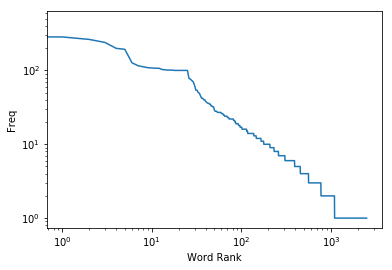

In [70]:
import matplotlib.pyplot as plt

word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

A plot of frequency values is intuitive and convenient, but it can also be
      useful to group together data values into bins that correspond to a
      range of frequencies. For example, how many words have a frequency
      between 1 and 5, between 5 and 10, between 10 and 15, and so forth? A
      <a class="ulink" href="http://bit.ly/1a1l6Sk" target="\_top"><span class="emphasis"><em>histogram</em></span></a> is
      designed for precisely this purpose and provides a convenient
      visualization for displaying tabulated frequencies as adjacent
      rectangles, where the area of each rectangle is a measure of the data
      values that fall within that particular range of values. Figures 1.5 and 1.6 show histograms of
      the tabular data generated from Examples 1.8 and 1.10,
      respectively. Although the histograms don't have x-axis labels that show
      us which words have which frequencies, that's not really their purpose.
      A histogram gives us insight into the underlying frequency distribution,
      with the x-axis corresponding to a range for words that each have a
      frequency within that range and the y-axis corresponding to the total
      frequency of all words that appear within that range.

When interpreting Figure&#160;1.5, &#8220;Histograms of tabulated frequency data for words, screen names,
        and hashtags, each displaying a particular kind of data that is
        grouped by frequency&#8221;, look back to the
      corresponding tabular data and consider that there are a large number of
      words, screen names, or hashtags that have low frequencies and appear few times in the text;
      however, when we combine all of these low-frequency terms and bin them
      together into a range of "all words with frequency between 1 and 10," we
      see that the total number of these low-frequency words accounts for most
      of the text. More concretely, we see that there are approximately 10
      words that account for almost all of the frequencies as rendered by the
      area of the large blue rectangle, while there are just a couple of words
      with much higher frequencies: "\#MentionSomeoneImportantForYou" and "RT,"
      with respective frequencies of 34 and 92 as given by our tabulated
      data.

Likewise, when interpreting Figure&#160;1.6, &#8220;A histogram of retweet frequencies&#8221;, we see that
      there are a select few tweets that are retweeted with a much higher
      frequencies than the bulk of the tweets, which are retweeted only once
      and account for the majority of the volume given by the largest blue
      rectangle on the left side of the histogram.

<div class="figure-title">Figure&#160;1.5.&#160;Histograms of tabulated frequency data for words, screen names,
        and hashtags, each displaying a particular kind of data that is
        grouped by frequency</div>
            <div class="figure-contents">
              <div class="mediaobject">
                <img alt="Histograms of tabulated frequency data for words, screen names, and hashtags, each displaying a particular kind of data that is grouped by frequency" src="files/resources/sampler-images/images/mswb_0105.png" />
              </div>
            </div>

<div class="figure-title">Figure&#160;1.6.&#160;A histogram of retweet frequencies</div>
            <div class="figure-contents">
              <div class="mediaobject">
                <img alt="A histogram of retweet frequencies" src="files/resources/sampler-images/images/mswb_0106.png" />
              </div>
            </div>

The code for generating these histograms directly in IPython
      Notebook is given in Examples 1.13 and 1.14. Taking some time to explore the
      capabilities of matplotlib and other scientific computing tools is a
      worthwhile investment.

#### Example 1.13. Generating histograms of words, screen names, and hashtags

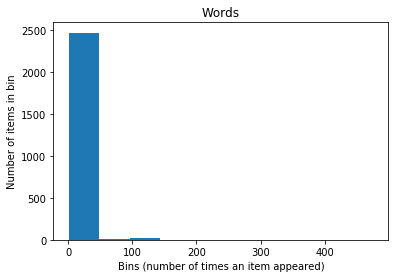

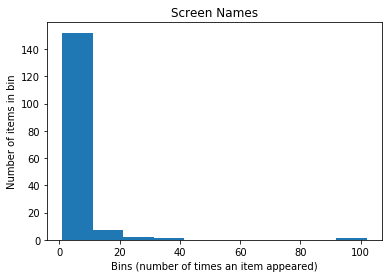

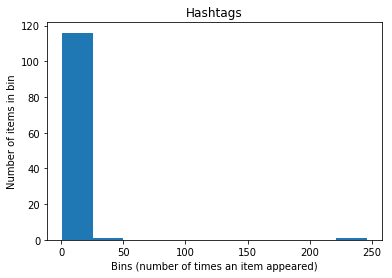

<Figure size 432x288 with 0 Axes>

In [71]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

#### Example 1.14. Generating a histogram of retweet counts

[2, 1946, 1946, 18, 61, 2, 1946, 12, 1946, 1946, 130, 97, 2, 214, 4, 1946, 1946, 11, 1946, 7, 43, 25, 4, 9, 1946, 71, 77, 6, 1946, 22, 77, 65, 207, 207, 4, 819, 65, 1946, 2, 4, 1946, 71, 62, 8, 3, 1946, 1, 1946, 25, 1, 65, 12, 9, 1946, 1946, 17, 11, 12, 2, 130, 62, 819, 4, 65, 245, 1946, 245, 29, 134, 28, 1946, 88, 11, 9, 106, 20, 1946, 1946, 1, 6, 1946, 1946, 3, 23, 207, 819, 8, 27, 1944, 360, 1124, 94, 0, 11, 1944, 819, 90, 65, 2, 6, 819, 12, 207, 1, 1944, 1944, 819, 88, 122, 67, 94, 65, 3, 1948, 1, 114, 4, 819, 246, 207, 2, 2, 65, 1948, 1948, 819, 17, 172, 1948, 66, 85, 34, 71, 32, 83, 23, 214, 62, 61, 65, 17, 48, 23, 1948, 9, 1948, 65, 68, 114, 13, 1948, 60, 2, 61, 68, 2, 76, 15, 43, 1947, 2, 2, 61, 122, 1947, 2, 8, 20, 2, 1947, 1, 208, 65, 27, 1947, 1, 65, 1947, 1947, 28, 83, 34, 1947, 130, 172, 88, 88, 1947, 2, 819, 31, 1, 6, 1947, 22, 67, 2, 1947, 819, 65, 2, 1947, 1, 1947, 2, 1947, 114, 121, 1, 5, 25, 1, 94, 97, 106, 60, 94, 1, 1947, 512, 71, 23, 21, 2, 106, 332, 16, 4, 246, 19

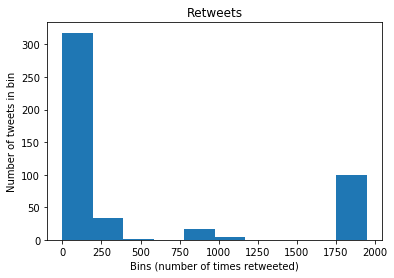

In [72]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print(counts)

# Closing Remarks

This chapter introduced Twitter as a successful technology platform that
    has grown virally and become "all the rage," given its ability to satisfy
    some fundamental human desires relating to communication, curiosity, and
    the self-organizing behavior that has emerged from its chaotic network
    dynamics. The example code in this chapter got you up and running with
    Twitter's API, illustrated how easy (and fun) it is to use Python to
    interactively explore and analyze Twitter data, and provided some starting
    templates that you can use for mining tweets. We started out the chapter
    by learning how to create an authenticated connection and then progressed
    through a series of examples that illustrated how to discover trending
    topics for particular locales, how to search for tweets that might be
    interesting, and how to analyze those tweets using some elementary but
    effective techniques based on frequency analysis and simple statistics.
    Even what seemed like a somewhat arbitrary trending topic turned out to
    lead us down worthwhile paths with lots of possibilities for additional
    analysis.

<blockquote><div><strong>Note:</strong></div><p>Chapter&#160;9, <em>Twitter Cookbook</em> contains a number of Twitter
      recipes covering a broad array of topics that range from tweet
      harvesting and analysis to the effective use of storage for archiving
      tweets to techniques for analyzing followers for insights.</p></blockquote>

One of the primary takeaways from this chapter from an analytical
    standpoint is that counting is generally the first step to any kind of
    meaningful quantitative analysis. Although basic frequency analysis is
    simple, it is a powerful tool for your repertoire that shouldn’t be
    overlooked just because it’s so obvious; besides, many other advanced
    statistics depend on it. On the contrary, frequency analysis and measures
    such as lexical diversity should be employed early and often, for
    precisely the reason that doing so is so obvious and simple. Oftentimes,
    but not always, the results from the simplest techniques can rival the
    quality of those from more sophisticated analytics. With respect to data
    in the Twitterverse, these modest techniques can usually get you quite a
    long way toward answering the question, “What are people talking about
    right now?” Now that's something we'd all like to know, isn't it?

<blockquote><div><strong>Note:</strong></div><p>The source code outlined for this chapter and all other chapters
      is available at <a class="ulink" href="http://bit.ly/1a1kNqy" target="\_top">GitHub</a> in a
      convenient IPython Notebook format that you're highly encouraged to try
      out from the comfort of your own web browser.</p></blockquote>

# Recommended Exercises

<ul class="itemizedlist">
            <li class="listitem">
              <p>Bookmark and spend some time reviewing <a class="ulink" href="http://bit.ly/1a1kSKQ" target="\_top">Twitter's API documentation</a>. In
          particular, spend some time browsing the information on the <a class="ulink" href="http://bit.ly/1a1kZ9i" target="\_top">REST API</a> and <a class="ulink" href="http://bit.ly/1a1kSL8" target="\_top">platform objects</a>.</p>
            </li>
            <li class="listitem">
              <p>If you haven't already, get comfortable working in <a class="ulink" href="http://bit.ly/1a1laRY" target="\_top">IPython</a> and <a class="ulink" href="http://bit.ly/1a1laSf" target="\_top">IPython Notebook</a> as a more
          productive alternative to the traditional Python interpreter. Over
          the course of your social web mining career, the saved time and
          increased productivity will really start to add up.</p>
            </li>
            <li class="listitem">
              <p>If you have a Twitter account with a nontrivial number of tweets, request your
          historical tweet archive from your <a class="ulink" href="http://bit.ly/1a1lb8D" target="\_top">account settings</a> and analyze it.
          The export of your account data includes files organized by time
          period in a convenient JSON format. See the
          <span class="emphasis"><em>README.txt</em></span> file included in the downloaded
          archive for more details. What are the most common terms that appear
          in your tweets? Who do you retweet the most often? How many of your
          tweets are retweeted (and why do you think this is the case)?</p>
            </li>
            <li class="listitem">
              <p>Take some time to explore Twitter's REST API with its <a class="ulink" href="http://bit.ly/1a1kWui" target="\_top">developer console</a>. Although we
          opted to dive in with the <code class="literal">twitter</code>
          Python package in a programmatic fashion in this chapter, the
          console can be useful for exploring the API, the effects of
          parameters, and more. The command-line tool <a class="ulink" href="http://bit.ly/1a1kZq1" target="\_top">Twurl</a> is another option to
          consider if you prefer working in a terminal.</p>
            </li>
            <li class="listitem">
              <p>Complete the exercise of determining whether there seems to be
          a spiritual or religious affiliation for the users who retweeted the
          status citing "God" as someone important to them, or follow the
          workflow in this chapter for a trending topic or arbitrary search
          query of your own choosing. Explore some of the <a class="ulink" href="http://bit.ly/1a1l3pN" target="\_top">advanced search features</a> that
          are available for more precise querying.</p>
            </li>
            <li class="listitem">
              <p>Explore <a class="ulink" href="http://yhoo.it/1a1kZ9u" target="\_top">Yahoo! GeoPlanet's
          Where On Earth ID API</a> so that you can compare and contrast
          trends from different locales.</p>
            </li>
            <li class="listitem">
              <p>Take a closer look at <a class="ulink" href="http://bit.ly/1a1l7Wv" target="\_top"><code class="literal">matplotlib</code></a> and learn how to create
          <a class="ulink" href="http://bit.ly/1a1lccP" target="\_top">beautiful plots of 2D and 3D data
          with IPython Notebook</a>.</p>
            </li>
            <li class="listitem">
              <p>Explore and apply some of the exercises from Chapter&#160;9, <em>Twitter Cookbook</em>.</p>
            </li>
          </ul>

# Online Resources

The following list of links from this chapter may be useful for
    review:

<ul class="itemizedlist">
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1lccP" target="\_top">Beautiful plots of 2D and
          3D data with IPython Notebook</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1kXyf" target="\_top">IPython "magic
          functions"</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1l2lJ" target="\_top">json.org</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1l6BN" target="\_top">PyLab</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1l1hy" target="\_top">Python list
          comprehensions</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1l1hy" target="\_top">The official Python
          tutorial</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1kZWN" target="\_top">OAuth</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1kSKQ" target="\_top">Twitter API
          documentation</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1l2ly" target="\_top">Twitter API Rate Limiting
          in v1.1</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1kWui" target="\_top">Twitter developer
          console</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1kX1a" target="\_top">Twitter Developer Rules of
          the Road</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1kZWW" target="\_top">Twitter's OAuth
          documentation</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1l3pN" target="\_top">Twitter Search API
          operators</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1l1ya" target="\_top">Twitter Streaming
          API</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1kWKB" target="\_top">Twitter terms of
          service</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://bit.ly/1a1kZq1" target="\_top">Twurl</a>
              </p>
            </li>
            <li class="listitem">
              <p>
                <a class="ulink" href="http://yhoo.it/1a1kZ9u" target="\_top">Yahoo! GeoPlanet's Where
          On Earth ID API</a>
              </p>
            </li>
          </ul>

<br />
        <hr style="width: 100; align: left;" />
        <div class="footnote">
          <p><sup>[1] </sup>Although it's an implementation detail, it may be worth noting
          that Twitter's v1.1 API still implements OAuth 1.0a, whereas many
          other social web properties have since upgraded to OAuth 2.0.</p>
        </div>